In [2]:
]add PyPlot

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/Projects/SparseGrids/Project.toml`
 [no changes]
   Updating `~/Projects/SparseGrids/Manifest.toml`
 [no changes]


In [3]:
using PyPlot

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


CONSTANTS - Create a Type

N = # of Points ; L = Domain Size

In [53]:
struct Params
#structure contains # of points N and Domain Space L
    N::Int
    L::Float64
end

In [54]:
p=Params(101,1.0)

Params(101, 1.0)

Defining the Grid Space

In [55]:
function dX(h::Params)
    #computing grid space h
    return (h.L/(h.N-1))
end

dX (generic function with 1 method)

In [56]:
dX(p)

0.01

FUNCTION THAT CONSTRUCTS 1D FUNCTION

In [57]:
function functionOn_1DGrid(u::Function, grid::Params)::Array{Float64,1}
    #1D Function is computed on the grid
    ux=zeros(grid.N)
    h=dX(grid)
    for i in 1:grid.N
        x=(i-1)*h
        ux[i]=u(x)
    end
    return ux
end

functionOn_1DGrid (generic function with 1 method)

In [58]:
x = functionOn_1DGrid(x->x,Params(100,2));
#101 points and identity map gives the coordinates

In [59]:
sinx=functionOn_1DGrid(x->sin(pi*x),Params(100,2));

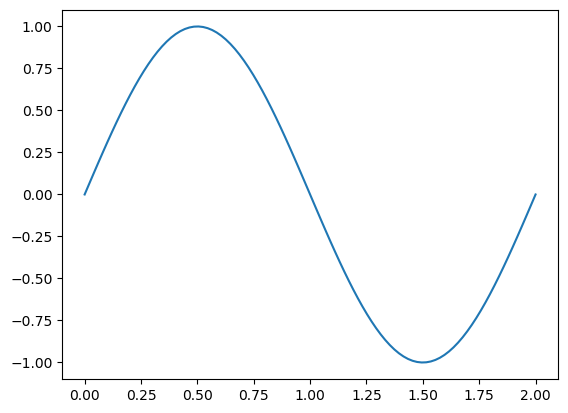

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x145850f90>

In [60]:
plot(x,sinx)

In [61]:
function Deriv1D(u::Array{Float64,1},grid::Params)::Array{Float64}
    #Derivative of a function is computed on a 1D grid
    dudx = zeros(grid.N)
    h = dX(grid)
    for i in 1:grid.N
        if i == 1
            dudx[i] = (u[i+1] - u[i])/h
        elseif i == grid.N
            dudx[i] = (u[i]-u[i-1])/h
        else
            dudx[i] = (u[i+1]-u[i-1])/2h
        end
    end
    return dudx
end
    

Deriv1D (generic function with 1 method)

1D Convergence Test

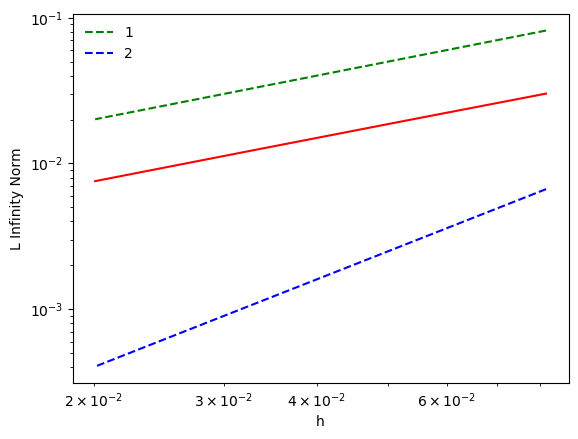

In [79]:
H = []
E = []

for N in 50:200
    grid = Params(N,4)
    u = functionOn_1DGrid(x->sin(x),grid)
    dUdx = functionOn_1DGrid(x->cos(x),grid) #known derivative of sin(x)
    
    #L infinity norm: difference between the numerical derivative and
    #the analytical one, while taking the maximum of it's abs. value
    error = maximum(abs.(Deriv1D(u,grid) - dUdx))
    
    h = dX(grid)
    #append h to the array H and error to the array E
    append!(H,h) 
    append!(E,error)
    
end

loglog(H,E,"r-") #plotting error vs h
loglog(H,H,"g--",label="1") #first order convergence
loglog(H,H.^2,"b--",label="2") #second order convergence
xlabel("h")
ylabel("L Infinity Norm")
legend(loc="best",frameon=false)
show()

In [86]:
function functionOn_2DGrid(u::Function, Nx::Int, Ny::Int)::Array{Float64,2}
    uxy = zeros(Nx,Ny)
    hx = 2/(Nx-1)
    hy = 2/(Ny-1)
    for i in 1:Nx,j in 1:Ny
            x = -1 + (i-1)*hx
            y = -1 + (j-1)*hy
            uxy[i,j] = u(x,y)
        end
        return uxy
    end

functionOn_2DGrid (generic function with 1 method)

In [87]:
sinxcosy = functionOn_2DGrid((x,y)->sin(x)*cos(y),100,200);

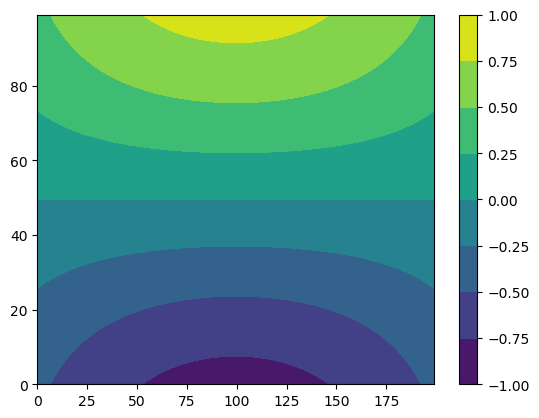

PyObject <matplotlib.colorbar.Colorbar object at 0x1463bde50>

In [90]:
contourf(sinxcosy)
colorbar()

In [91]:
x2y2= functionOn_2DGrid((x,y)->x^2+y^2,100,100);

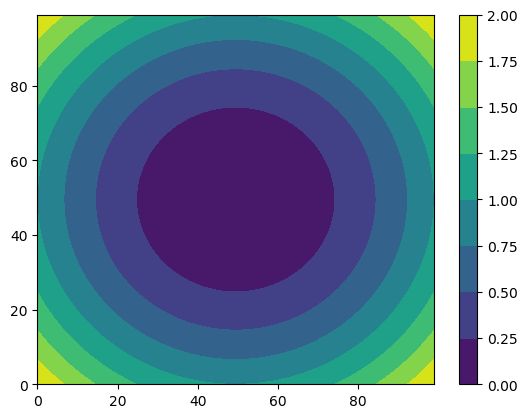

PyObject <matplotlib.colorbar.Colorbar object at 0x146002f10>

In [93]:
contourf(x2y2)
colorbar()

In [88]:
typeof(sinxcosy)

Array{Float64,2}

In [74]:
function DerivX_2D(u::Array{Float64,2}, Nx::Int, Ny::Int)::Array{Float64}
    dudx= zeros(Nx,Ny)
    hx = 2/(Nx-1)
    for i in 1:Nx, j in 1:Ny
        if 1==1
            dudx[i] = (u[i+1,j] - u[i,j])/hx
        elseif i==Nx
            dudx[i] = (u[i,j] - u[i-1,j])/hx
        else
            dudx[i] = (u[i+1,j]-u[i-1,j])/2hx
        end
    end
    return dudx
end
        

DerivX_2D (generic function with 1 method)

In [75]:
function DerivY_2D(u::Array{Float64,2},Nx::Int,Ny::Int)::Array{Float64}
    dudy= zeros(Nx,Ny)
    hy = 2/(Ny-1)
    for i in 1:Nx, j in 1:Ny
        if j == 1
            dudy[j] = (u[i,j+1] - u[i,j])/hy
        elseif j== Ny
            dudy[j] = (u[i,j]-u[i,j-1])/hy
        else
            dudy[j] = (u[i,j+1]-u[i,j-1])/2hy
        end
    end
    return dudy
end

DerivY_2D (generic function with 1 method)

In [89]:
Hx = []
Ex = []
Hy = []
Ey = []

for Nx in 50:100, Ny in 50:100
    u = functionOn_2DGrid((x,y)->sin(pi*x)*cos(pi*y),Nx,Ny)
    #analytical derivatives
    dUdx = functionOn_2DGrid((x,y)->pi*cos(pi*x)*cos(pi*y),Nx,Ny)
    dUdy = functionOn_2DGrid((x,y)->sin(pi*x)*(-pi)*sin(pi*y),Nx,Ny)
    errorx = maximum(abs.(DerivX_2D(u,Nx,Ny)-dUdx))
    errory = maximum(abs.(DerivY2D(u,Nx,Ny)-dUdy))
    hx = 2/(Nx-1)
    hy = 2/(Ny-1)
    append!(Hx,hx)
    append!(Ex,errorx)
    append!(Hy,hy)
    append!(Ey,errory)
end

loglog(Hx,Ex,"r-")
#loglog(Hy,Ey,"b-")
loglog(Hx,Hx.^2,"--", label="2")
loglog(Hx,Hx,"--",label="1")
xlabel("hx")
ylabel("L Infinity Norm")
legend(loc="best", frameon=false)
show()

BoundsError: BoundsError: attempt to access 50×50 Array{Float64,2} at index [51, 1]

Function that I want to test

In [27]:
sin2D = zeros(p.N,p.N)
for i in 1:p.N, j in 1:p.N
    x=(i-1)*h
    y=(j-1)*h
    sin2D[i,j]=sin(x)*cos(y)
end

In [13]:
cos2D = zeros(p.N-1,p.N-1)
for i in 1:p.N-1, j in 1:p.N-1
    cos2D[i,j]=cos(i)*cos(j)
end

In [14]:
struct Test
    h::Float64
    test::Array
end

In [15]:
sin2Dtype=Test(h,sin2D)

Test(0.05, [0.4546487134128409 -0.35017548837401463 … 0.8319662487496519 0.34338921443655185; 0.49129549643388193 -0.37840124765396416 … 0.8990265652078064 0.3710679687406361; … ; 0.08097900197797579 -0.06237092667175042 … 0.14818428935469266 0.061162200738095626; 0.4932664240995042 -0.37991927803104003 … 0.9026331855459921 0.37255658023967436])

In [16]:
function dudx(u::Test,i::Int64,j::Int64)
    if i==1 
        du = (u.test[i+1,j]-u.test[i,j])/u.h
    elseif i==p.N
        du = (u.test[i,j]-u.test[i-1,j])/u.h
    else
        du=(u.test[i+1,j]-u.test[i-1,j]/2*u.h)
    end
    return du
    
end

dudx (generic function with 1 method)

In [18]:
dSindx=zeros(p.N,p.N)
for i in 1:p.N
    for j in 1:p.N
    dSindx[i,j]=dudx(sin2Dtype,i,j)
    end  
end

BoundsError: BoundsError: attempt to access 20×20 Array{Float64,2} at index [2, 21]

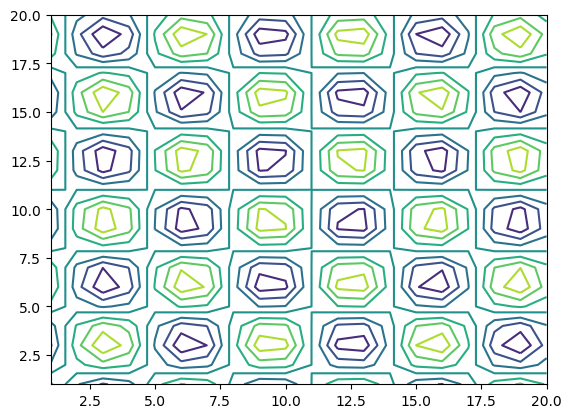

PyObject <matplotlib.contour.QuadContourSet object at 0x151c99ed0>

In [74]:
contour(x,y,cos2D)

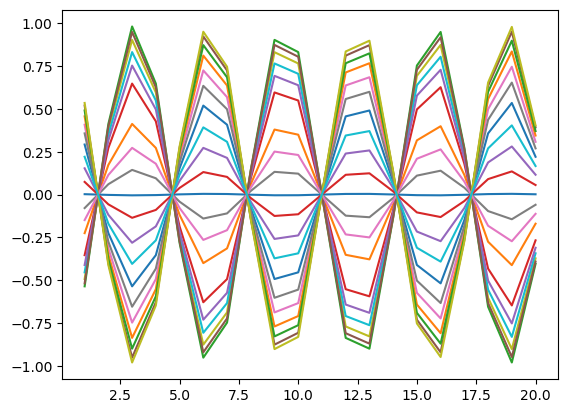

20-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x150b249d0>
 PyObject <matplotlib.lines.Line2D object at 0x150b24bd0>
 PyObject <matplotlib.lines.Line2D object at 0x150b116d0>
 PyObject <matplotlib.lines.Line2D object at 0x150b11b50>
 PyObject <matplotlib.lines.Line2D object at 0x150b11f50>
 PyObject <matplotlib.lines.Line2D object at 0x150b11cd0>
 PyObject <matplotlib.lines.Line2D object at 0x150b11850>
 PyObject <matplotlib.lines.Line2D object at 0x150b11350>
 PyObject <matplotlib.lines.Line2D object at 0x150b11dd0>
 PyObject <matplotlib.lines.Line2D object at 0x150b11f10>
 PyObject <matplotlib.lines.Line2D object at 0x1519a4a10>
 PyObject <matplotlib.lines.Line2D object at 0x1509b4d90>
 PyObject <matplotlib.lines.Line2D object at 0x1509b4d10>
 PyObject <matplotlib.lines.Line2D object at 0x1509b4dd0>
 PyObject <matplotlib.lines.Line2D object at 0x1509a9450>
 PyObject <matplotlib.lines.Line2D object at 0x150b09410>
 PyObject <matplotlib.lines.Line2D 

In [51]:
plot(x,cos2D)